In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Problem Statement**

Implement a KNN model to classify the different types of Glass

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

Content Attribute Information:

Id number: 1 to 214 (removed from CSV file)

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)

-- 1 buildingwindowsfloatprocessed -- 2 buildingwindowsnonfloatprocessed -- 3 vehiclewindowsfloatprocessed -- 4 vehiclewindowsnonfloatprocessed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps Acknowledgements

Source: https://archive.ics.uci.edu/ml/datasets/Glass+Identification 

Here, we dont have 4 - vehiclewindowsfloatprocessed, we have all ther glass types in this dataset.

# **Step 1: Importing data**


In [ ]:
df = pd.read_csv('/content/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **Step 2: EDA**



**2.1 Basic descriptive analysis**

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Lets convert type to its descriptive name to make the interpretations easier.

 1 => buildingwindowsfloatprocessed -- 2 =>  buildingwindowsnonfloatprocessed -- 3 => vehiclewindowsfloatprocessed -- 5 => containers -- 6 => tableware -- 7 => headlamps

In [ ]:
# df.loc[condition, column_name] = new_value

df.loc[df['Type'] == 1, 'Type'] = 'window_prcsd'
df.loc[df['Type'] == 2, 'Type'] = 'window_non_prcsd'
df.loc[df['Type'] == 3, 'Type'] = 'vehicle_window_prcsd'
df.loc[df['Type'] == 5, 'Type'] = 'containers'
df.loc[df['Type'] == 6, 'Type'] = 'tableware'
df.loc[df['Type'] == 7, 'Type'] = 'headlamps'
df.value_counts('Type')

Type
window_non_prcsd        76
window_prcsd            70
headlamps               29
vehicle_window_prcsd    17
containers              13
tableware                9
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
df[df.duplicated(keep =False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,window_prcsd
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,window_prcsd


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape              #duplicates value is dropped

(213, 10)

**2.2 Checking relationship between features**

In [ ]:
np.round(df.corr(),2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.00,-0.20,-0.13,-0.40,-0.54,-0.29,0.81,0.00,0.15
Na,-0.20,1.00,-0.28,0.17,-0.06,-0.26,-0.28,0.33,-0.24
Mg,-0.13,-0.28,1.00,-0.48,-0.16,0.01,-0.45,-0.49,0.09
Al,-0.40,0.17,-0.48,1.00,-0.02,0.32,-0.26,0.48,-0.08
Si,-0.54,-0.06,-0.16,-0.02,1.00,-0.20,-0.21,-0.10,-0.10
K,-0.29,-0.26,0.01,0.32,-0.20,1.00,-0.32,-0.04,-0.01
Ca,0.81,-0.28,-0.45,-0.26,-0.21,-0.32,1.00,-0.11,0.13
Ba,0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06
Fe,0.15,-0.24,0.09,-0.08,-0.10,-0.01,0.13,-0.06,1.00


<Axes: >

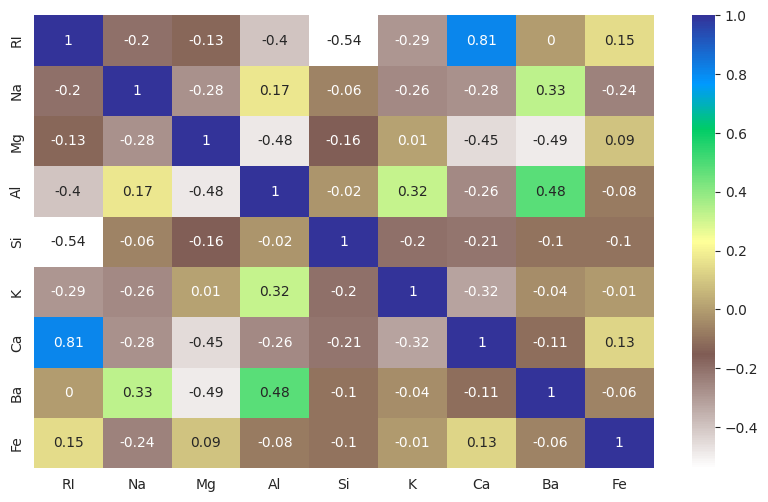

In [ ]:
plt.rcParams ['figure.figsize'] = (10,6)
plt.rcParams ['figure.dpi'] = 100

sns.heatmap(np.round(df.corr(),2), annot =True, cmap ='terrain_r')

<Figure size 1500x2000 with 0 Axes>

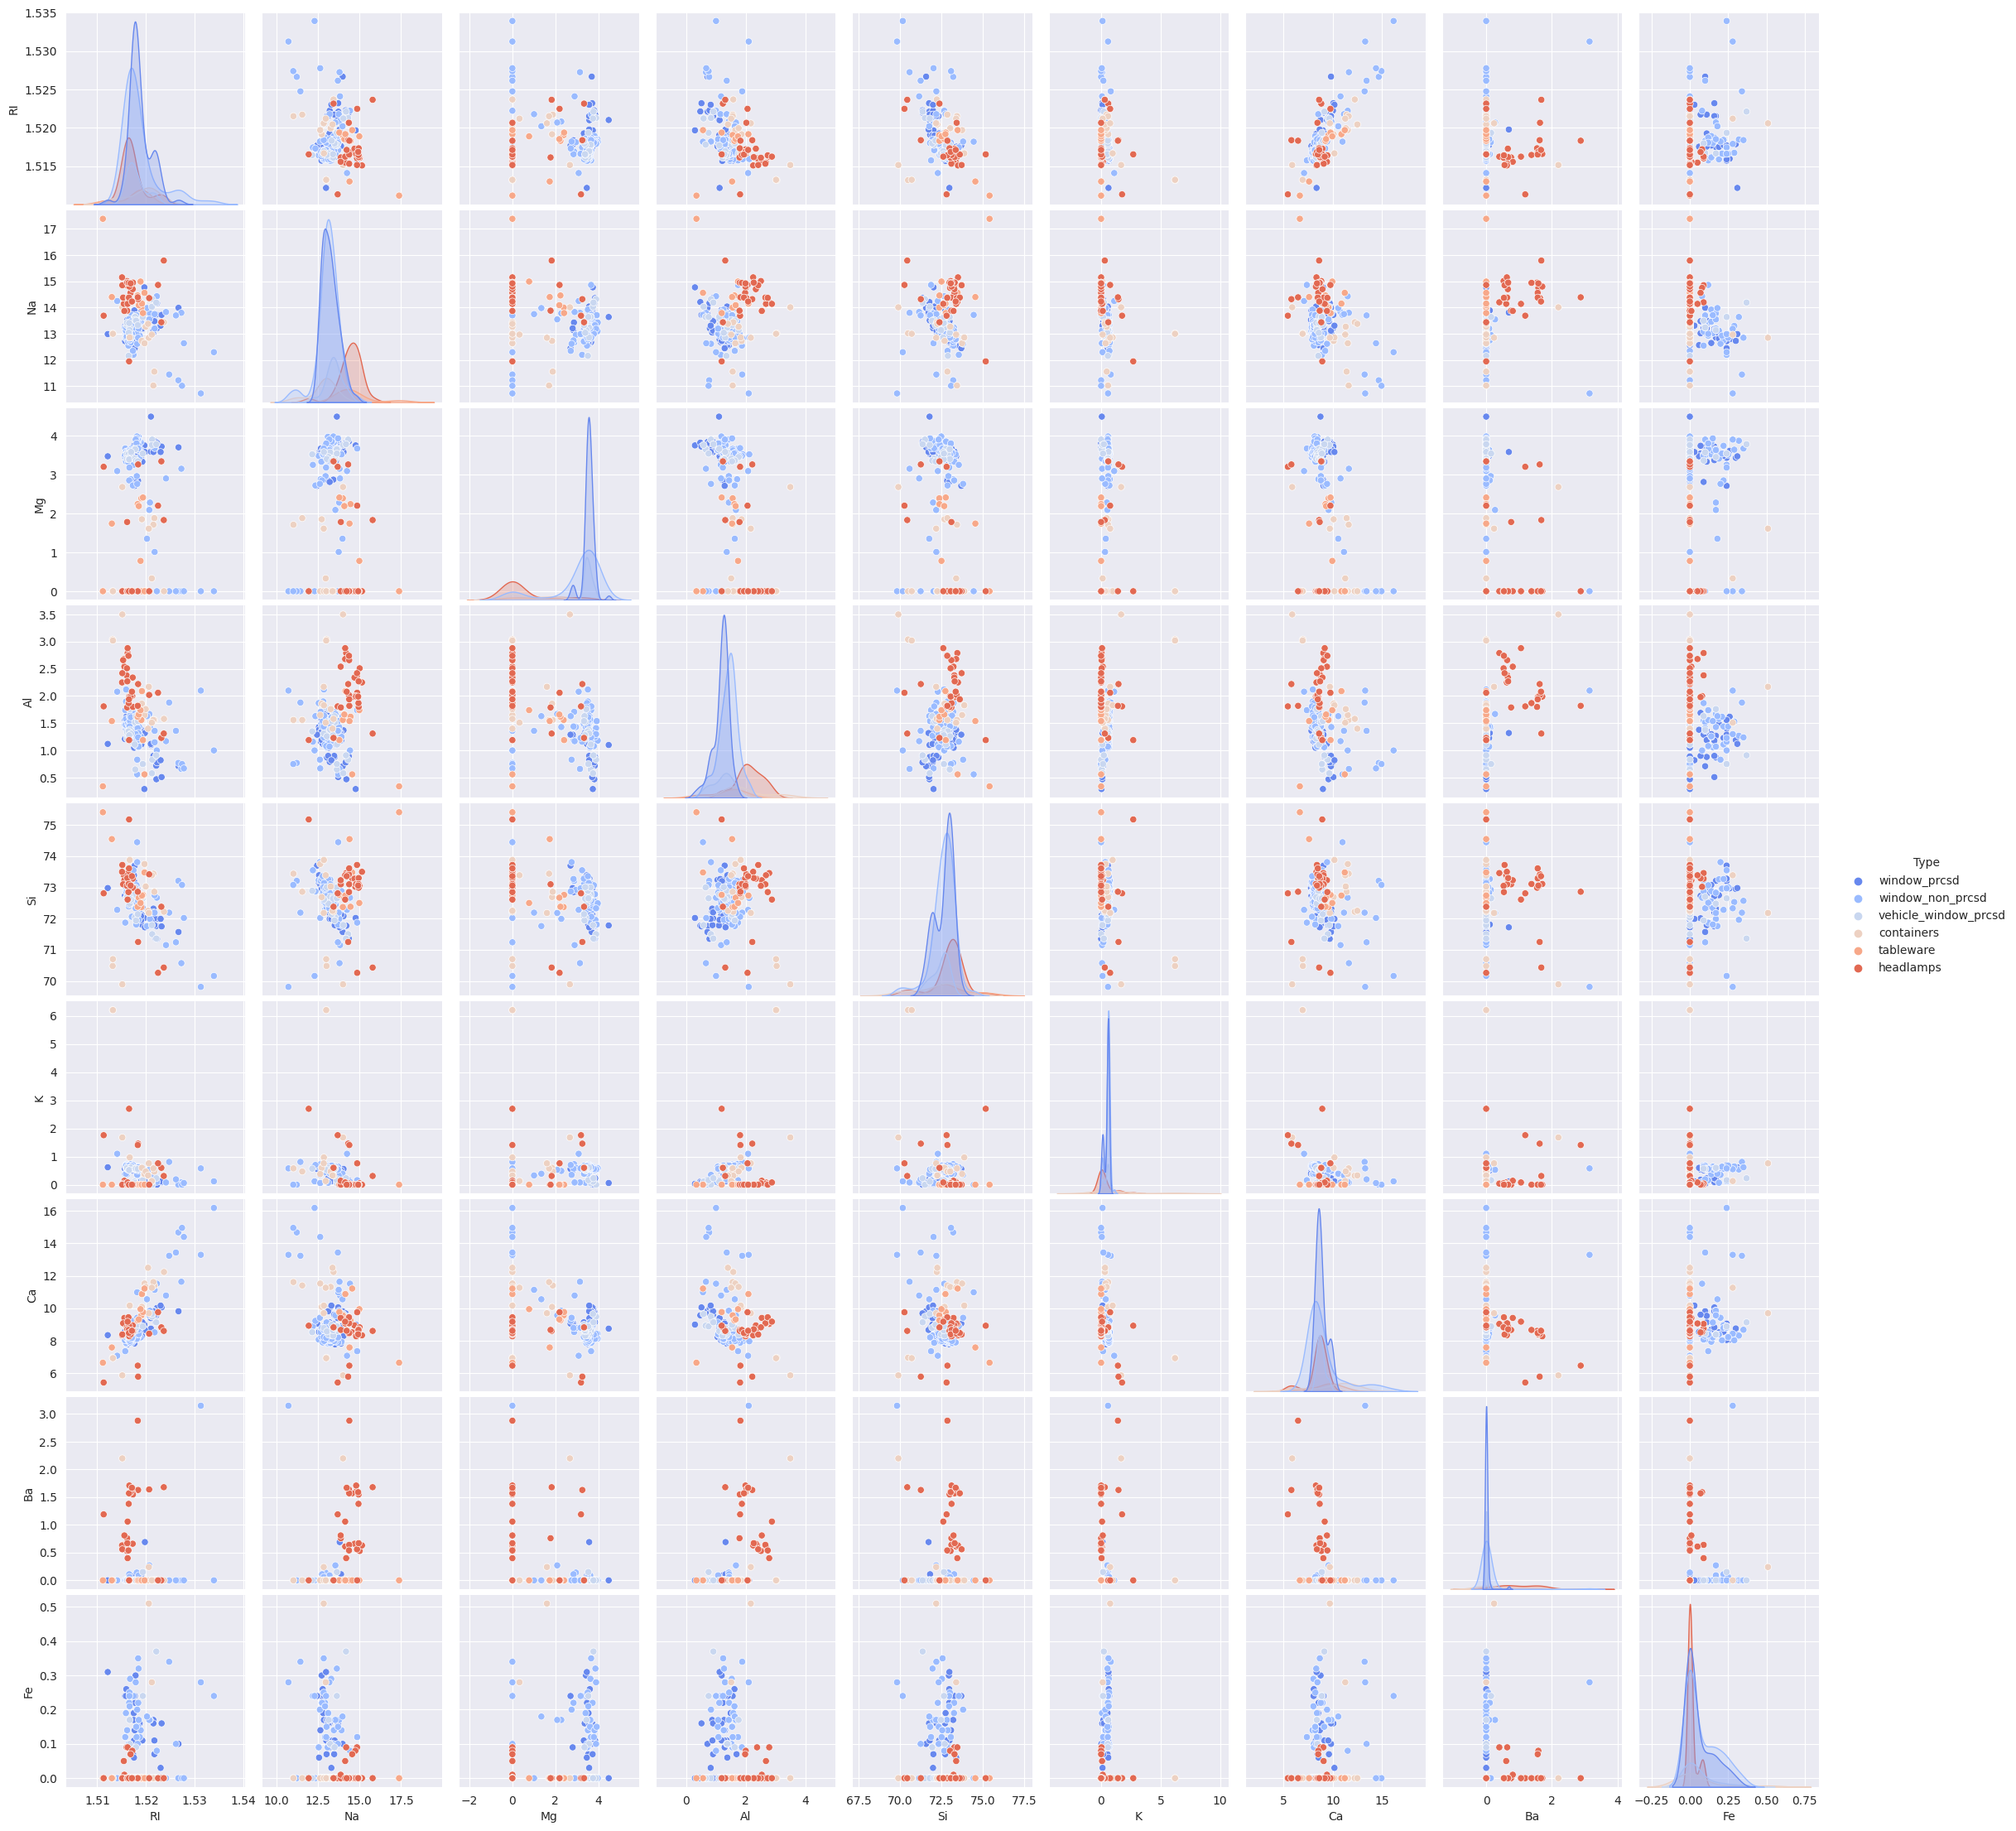

In [ ]:
fig= plt.figure(figsize=(15, 20))
sns.pairplot(df ,hue ='Type', palette='coolwarm')
plt.show()

**2.3 Visualizing and Analysing data**

In [ ]:
df.value_counts('Type')

Type
window_non_prcsd        76
window_prcsd            69
headlamps               29
vehicle_window_prcsd    17
containers              13
tableware                9
dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'window_prcsd'),
  Text(1, 0, 'window_non_prcsd'),
  Text(2, 0, 'vehicle_window_prcsd'),
  Text(3, 0, 'containers'),
  Text(4, 0, 'tableware'),
  Text(5, 0, 'headlamps')])

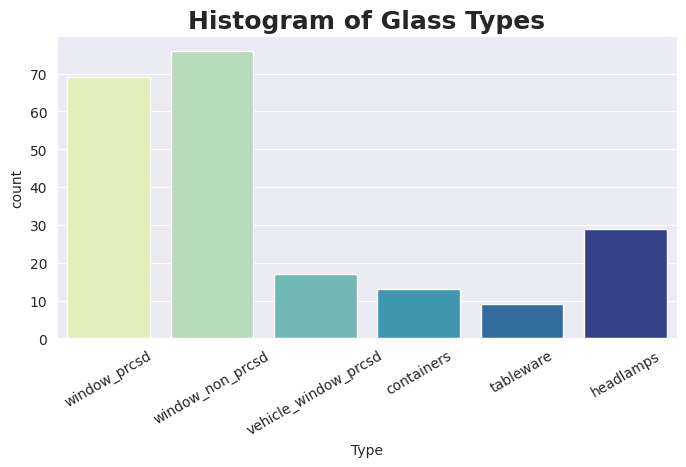

In [ ]:
fig= plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')

sns.countplot(x = df['Type'], palette='YlGnBu')
plt.title('Histogram of Glass Types', fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 30)

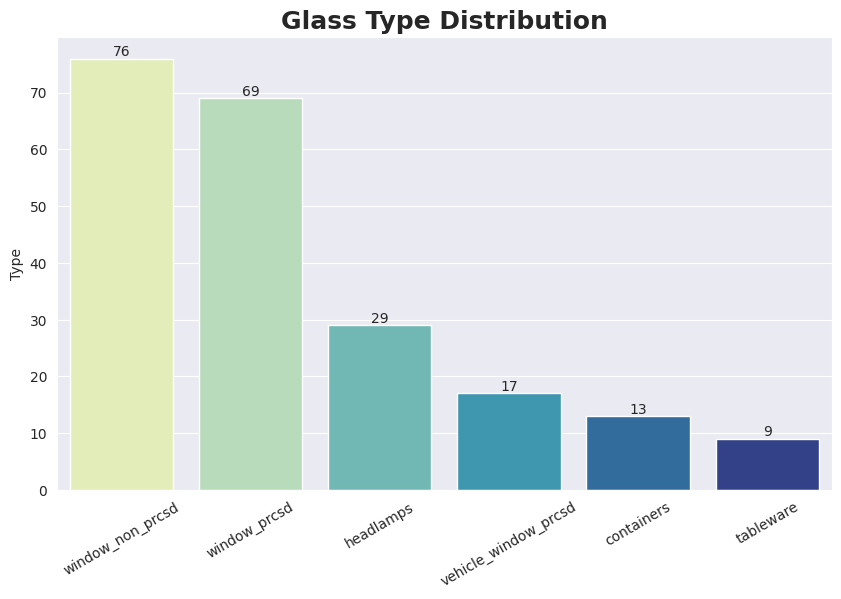

In [ ]:
from matplotlib import container
#Sorting the Classes with frequency on the graph

ax =  sns.barplot(x = df['Type'].value_counts().index.tolist(), y = df['Type'].value_counts(), palette='YlGnBu')
plt.title("Glass Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 30)

for i in ax.containers:
  ax.bar_label(i)

In [ ]:
df = df.rename(columns = {'Type': 'type'})

In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

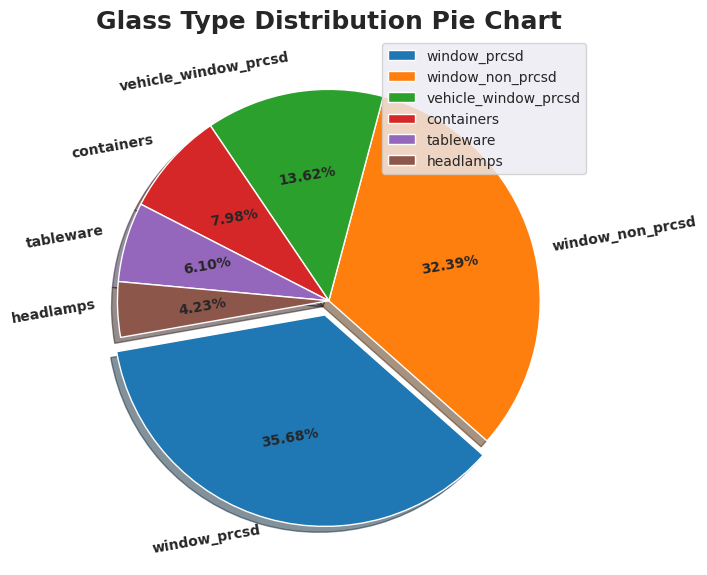

In [ ]:
plt.figure(figsize = (8,7))

plt.pie(df['type'].value_counts(),
       labels=df.type.unique(),
       explode = [0.07,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'fontsize' : 10,
                    'fontweight':'bold',
                    'rotation': 10})

plt.legend(loc = 'upper right')
plt.title("Glass Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

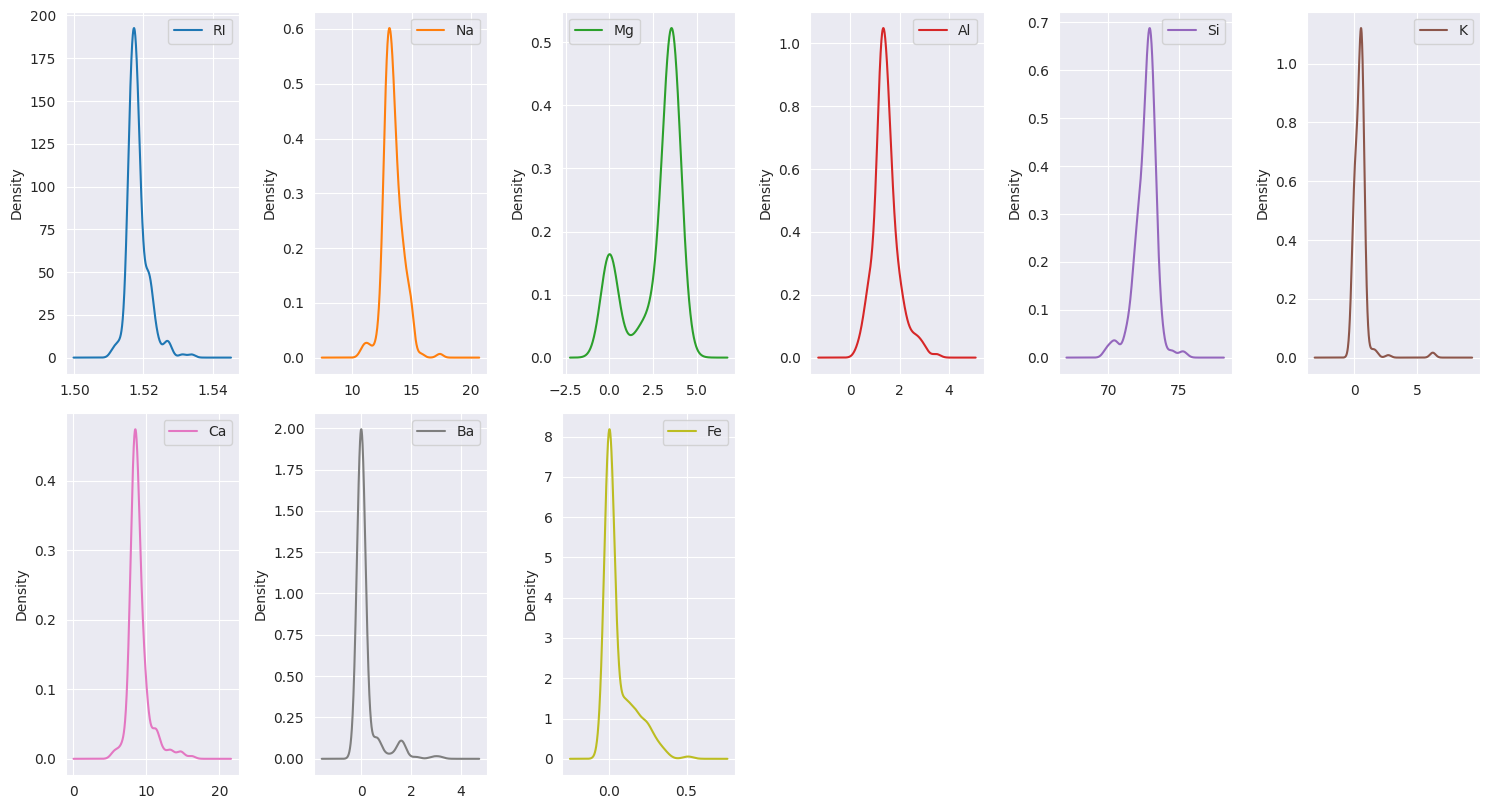

In [ ]:
df.plot(kind='density', subplots= True, layout = (5,6), figsize=(15,20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


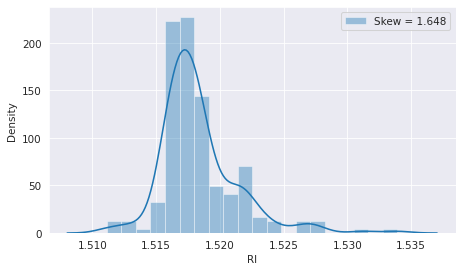

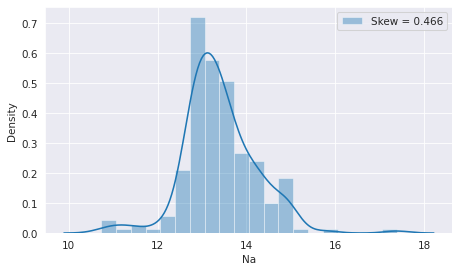

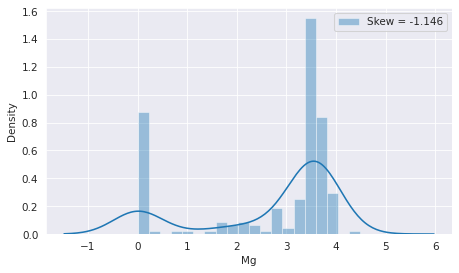

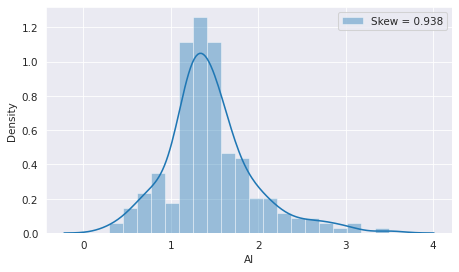

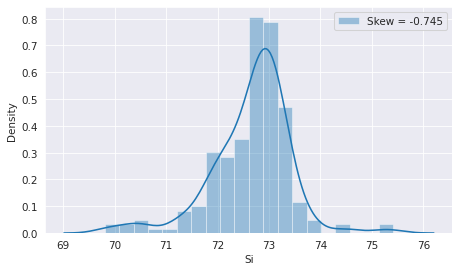

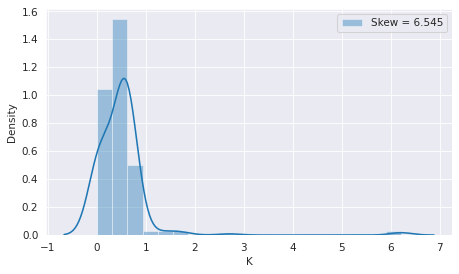

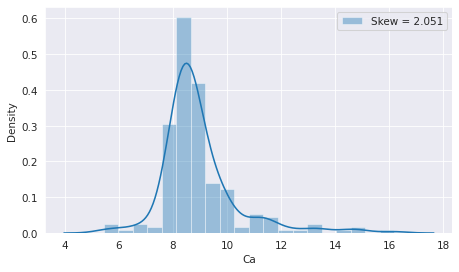

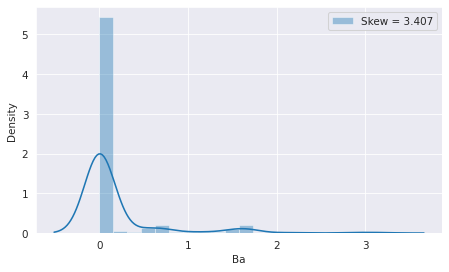

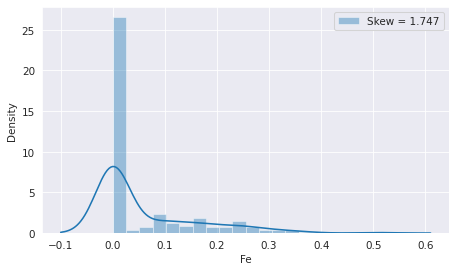

In [ ]:
plt.rcParams ['figure.figsize'] = (7,4)
plt.rcParams ['figure.dpi'] = 75

features = df.columns[:-1].tolist()
for i in features:
    skew = df[i].skew()
    sns.distplot(df[i], label='Skew = %.3f'%(skew), bins=20)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

**2.4 Outlier Detection**

<Axes: >

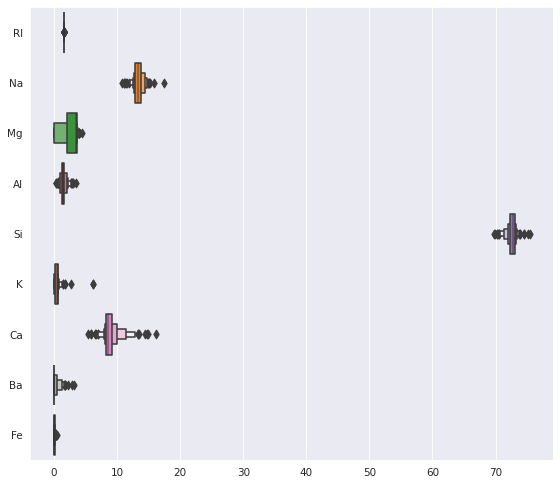

In [ ]:
fig= plt.figure(figsize=(9, 8))
sns.boxenplot(data=df, orient ='h')

Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

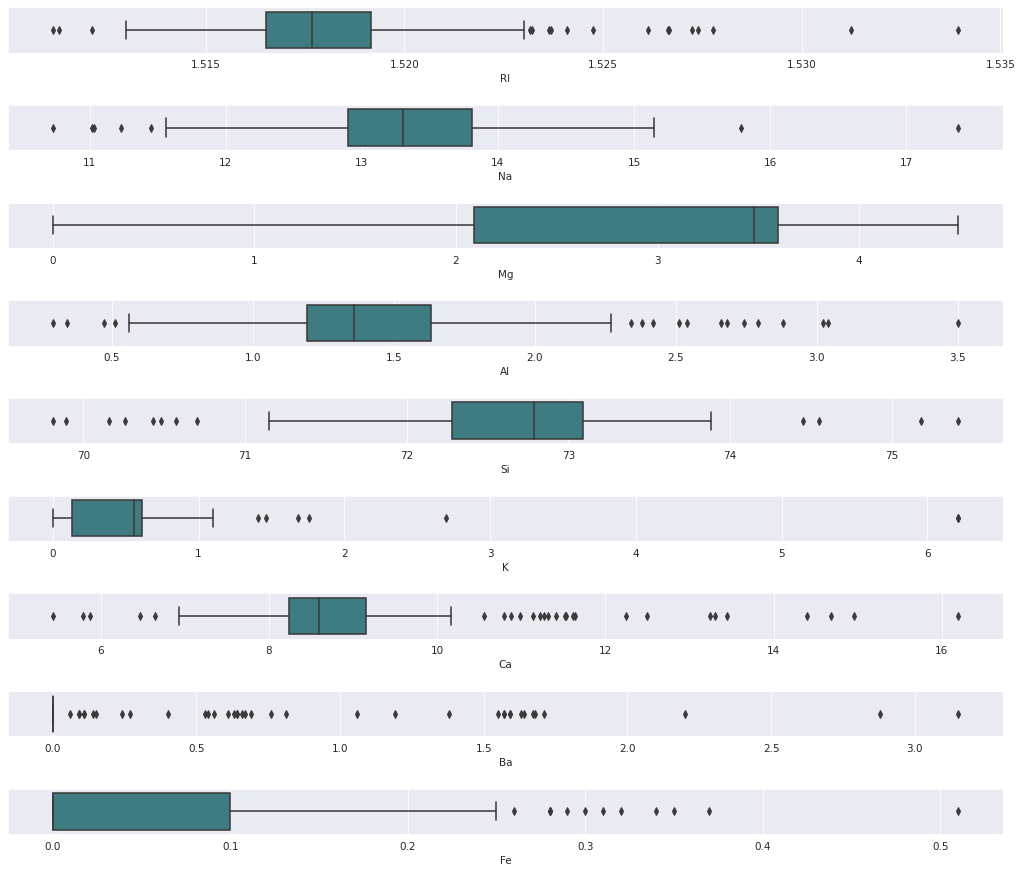

In [ ]:
ot=df.copy() 

fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])

plt.tight_layout(pad=2.0)

In [ ]:
ot = ot.drop('type', axis =1)
ot.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


# **Step 3: Model Building**

**3.1 Feature Scaling**

Note:

*   For any alogrithm that  involves distance calculation, feature scaling is mandatory


*   Never  perform feature scaling on target column


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,window_prcsd
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,window_prcsd


In [ ]:
#splitting independant and dependant features

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x = sc.fit_transform(x)      #perform feature scaling only on independent columns
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

**3.2 Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()                        #seleted k=5 by default

In [ ]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(ytest,ypred)

array([[ 1,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  2],
       [ 2,  0,  0,  0, 10,  1],
       [ 0,  0,  0,  1,  3, 14]])

In [ ]:
print(classification_report(ytest,ypred))

                      precision    recall  f1-score   support

          containers       0.33      1.00      0.50         1
           headlamps       1.00      1.00      1.00         3
           tableware       1.00      1.00      1.00         2
vehicle_window_prcsd       0.50      0.17      0.25         6
    window_non_prcsd       0.62      0.77      0.69        13
        window_prcsd       0.82      0.78      0.80        18

            accuracy                           0.72        43
           macro avg       0.71      0.79      0.71        43
        weighted avg       0.73      0.72      0.71        43



In [ ]:
 #training accuracy

print(knn.score(xtrain,ytrain))

0.7823529411764706


In [ ]:
#testing accuracy

print(knn.score(xtest,ytest))

0.7209302325581395


**3.3 Selecting best K value**

In [ ]:
trainac = []
testac = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xtrain,ytrain)
  ypred = knn.predict(xtest)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

Text(0, 0.5, 'Accuracy')

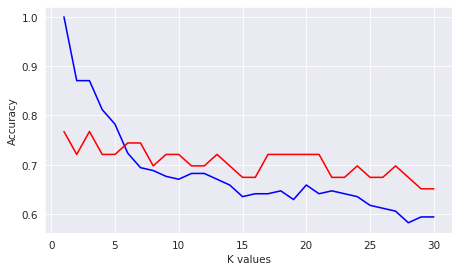

In [ ]:
plt.plot(range(1,31), trainac, color = 'b')
plt.plot(range(1,31), testac, color ='r' )

plt.xlabel('K values')
plt.ylabel('Accuracy')

The only point training accuracy and testing accuracy seem to intersect is when k = 6

In [ ]:
## when k = 6

knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print('Training Accuracy = ', np.round(knn.score(xtrain,ytrain),2))
print('Testing Accuracy = ', np.round(knn.score(xtest,ytest),2))

Training Accuracy =  0.72
Testing Accuracy =  0.74


**3.4 Handling Outlier and Trying to fit the model**

In [ ]:
from collections import Counter

#Detect observations with more than one outlier

def outlier_hunt(ot):
    """
    Takes a dataframe ot(with no cat cols) of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in ot.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(ot[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(ot[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        upper_whisker = Q3+(1.5*IQR)
        lower_whisker = Q1-(1.5*IQR)
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = ot[(ot[col] < lower_whisker) | (ot[col] > upper_whisker)].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, i in outlier_indices.items() if i > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(ot[features]))))     #%s will return the string and %d will return number


The dataset contains 14 observations with more than 2 outliers


*Aha! there exists some 14 observations with multiple outliers. These could harm the efficiency of our learning algorithms. We'll make sure to get rid of these in the next sections.*

In [ ]:
outlier_hunt(ot)

[103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207]

In [ ]:
outlier_index = outlier_hunt(ot)
outlier_index

[103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207]

In [ ]:
len(outlier_index)

14

In [ ]:
type = df.iloc[:,-1]
type

0      window_prcsd
1      window_prcsd
2      window_prcsd
3      window_prcsd
4      window_prcsd
           ...     
209       headlamps
210       headlamps
211       headlamps
212       headlamps
213       headlamps
Name: type, Length: 213, dtype: object

In [ ]:
ot['Type'] = type

In [ ]:
ot.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
ot.shape

(213, 10)

In [ ]:
ot = ot.drop(outlier_index).reset_index(drop=True)
print(ot.shape)
ot.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,window_prcsd
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,window_prcsd
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,window_prcsd
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,window_prcsd
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,window_prcsd


In [ ]:
file_name = 'ot_new.xlsx'
  
# saving the excel
ot.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')  #It is save inside the colab files, download it

DataFrame is written to Excel File successfully.


Now, all the rows that contains more than 2 outlirs has been removed. Let's run the model again for this dataset ot and try.

In [ ]:
X1 = ot.iloc[:,:-1]
Y1 = ot.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X1train,X1test,Y1train,Y1test = train_test_split(X1, Y1, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X1train,Y1train)
Y1pred = knn.predict(X1test)

In [ ]:
print(classification_report(Y1test,Y1pred))

                      precision    recall  f1-score   support

          containers       0.50      0.50      0.50         2
           headlamps       0.67      0.50      0.57         4
           tableware       0.50      0.50      0.50         2
vehicle_window_prcsd       0.25      0.25      0.25         4
    window_non_prcsd       0.45      0.50      0.48        10
        window_prcsd       0.72      0.72      0.72        18

            accuracy                           0.57        40
           macro avg       0.52      0.50      0.50        40
        weighted avg       0.58      0.57      0.58        40



In [ ]:
trainac = []
testac = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X1train,Y1train)
  ypred = knn.predict(X1test)
  trainac.append(knn.score(X1train,Y1train))
  testac.append(knn.score(X1test,Y1test))

Text(0, 0.5, 'Accuracy')

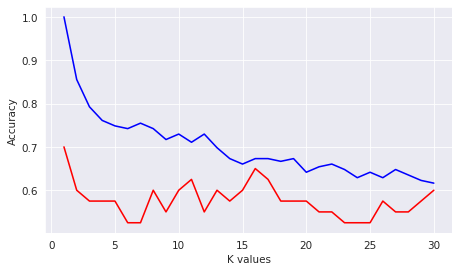

In [ ]:
plt.plot(range(1,31), trainac, color = 'b')
plt.plot(range(1,31), testac, color ='r' )

plt.xlabel('K values')
plt.ylabel('Accuracy')

▶ As we can see, removing outliers is not helping in this dataset. We couldn't see any intersection in the graph. So lets go ahead with the model fitted before removing outliers where k was 6.

In [ ]:
## when k = 6

knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print(classification_report(ytest,ypred))

                      precision    recall  f1-score   support

          containers       0.33      1.00      0.50         1
           headlamps       1.00      1.00      1.00         3
           tableware       1.00      1.00      1.00         2
vehicle_window_prcsd       0.50      0.17      0.25         6
    window_non_prcsd       0.67      0.77      0.71        13
        window_prcsd       0.83      0.83      0.83        18

            accuracy                           0.74        43
           macro avg       0.72      0.79      0.72        43
        weighted avg       0.74      0.74      0.73        43



In [ ]:
print('Training Accuracy = ', np.round(knn.score(xtrain,ytrain),2))
print('Testing Accuracy = ', np.round(knn.score(xtest,ytest),2))

Training Accuracy =  0.72
Testing Accuracy =  0.74


In [ ]:
knn.score(xtest,ytest)

0.7441860465116279

▶ Accuracy is 74.4%. There is little overfitting but that is negligible. This is the best model with highest accuracy we can get. So, lets fix this model as the final model. 